# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [6]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [7]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [8]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


- 케라스는 과하게 친절해서 흑백에 대한 1이 생략되어 있다...
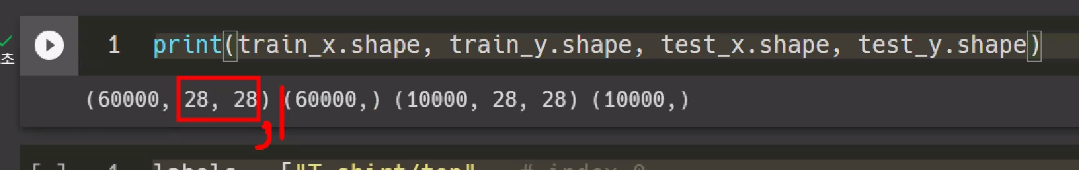

In [9]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels) # 패션의류들인 것을 확인할 수 있다.

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 9817
다음 그림은 Bag 입니다.


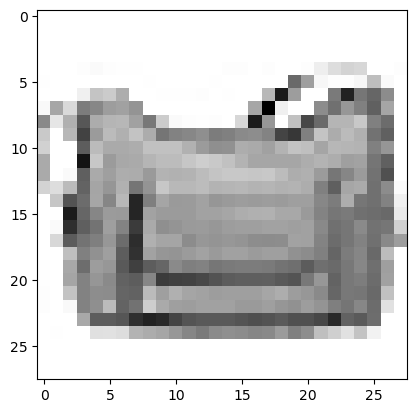

In [10]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

## 전처리)

### X에 대한 전처리 : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [11]:
# 각 피처간의 영향력을 균등하게, 근본적으로 최악의 학습을 방지하기 위해 Scaling을 함
print(f'max : {train_x.max()} , min : {train_x.min()}')

max : 255 , min : 0


In [12]:
max_num = train_x.max()

train_x = train_x/max_num
test_y = test_x/max_num

In [13]:
print(f'max : {train_x.max()} , min : {train_x.min()}')


max : 1.0 , min : 0.0


In [ ]:
## 또 다른 스케일링 방법
# max_v, min_v = train_x.max(), train_x.min()

# train_x = (train_x - min_v) / (max_v - min_v)
# test_x = (test_x - min_v) / (max_v - min_v)

### X에 대한 전처리 : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [14]:
train_x.shape, test_x.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
_, h, w = train_x.shape

print(h, w)

28 28


In [17]:
# train_x = train_x.reshape(train_x.shape[0], htrain_x.shape[1], train_x.shape[2], 1)
train_x = train_x.reshape(train_x.shape[0], h, w, 1)
test_x = test_x.reshape(test_x.shape[0], h, w, 1)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)
# 흑백은 1이고 컬러는 3이다 RGB

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000, 28, 28)


### Y에 대한 전처리 : One-Hot Encoding

In [21]:
from tensorflow.keras.utils import to_categorical # 구조까지 확인, 원핫인코딩


In [23]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [25]:
len_y = len(set((train_y)))
len_y

10

In [26]:
train_y.shape

(60000,)

In [27]:
train_y = to_categorical(train_y, len_y)
test_y = to_categorical(test_y, len_y)

In [28]:
train_y.shape

(60000, 10)

In [29]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [18]:
import tensorflow as tf
from tensorflow import keras

In [31]:
## Sequential API
# 1번. 세션 클리어
keras.backend.clear_session()
# 2번. 모델 발판 생성
model = keras.models.Sequential()
# 3번. 모델 블록 조립
# 1. 인풋 레이어
model.add( keras.layers.Input(shape = (28, 28, 1)))
# 2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters = 32, # 새롭게 만들려는는 피처맵의 갯수
                               kernel_size = (3,3), # 훑는 필터의 가로세로 사이즈 >> 새롭게 만들어지는 피처맵의 사이즈
                               padding = 'same', # 필터가 훑기 이전 사이즈를 유지하려는 기법 >> 필터가 훑기 이전과 동일한 규격으로 하고 싶어요
                               strides = (1,1), # 기본적으로 한 칸씩 이동하며 훑는다 >> 스트라이즈는 딱히 명시되진 않았지만 디폴트가 1,1
                               activation ='relu')) # 주의
# 3. BatchNormalization >> 모델 성능을 안정화시키기 위한 기법 중 하나
model.add( keras.layers.BatchNormalization())
# 4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters = 32, # 새롭게 만들려는는 피처맵의 갯수
                               kernel_size = (3,3), # 훑는 필터의 가로세로 사이즈 >> 새롭게 만들어지는 피처맵의 사이즈
                               padding = 'same', # 필터가 훑기 이전 사이즈를 유지하려는 기법 >> 필터가 훑기 이전과 동일한 규격으로 하고 싶어요
                               strides = (1,1), # 기본적으로 한 칸씩 이동하며 훑는다 >> 스트라이즈는 딱히 명시되진 않았지만 디폴트가 1,1
                               activation ='relu')) # 주의
# 5. BatchNormalization
model.add( keras.layers.BatchNormalization())
# 6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2), # pooling filter의 가로 세로 사이즈
                                  strides = (2,2)))# pooling filter가 어떻게 이동할 것인지
# 7. DropOut : 25% 비활성화 >> 학습되는 과정에서 의도적으로 노드를 비활성화, 죽이는 것 >> 과적합을 막는 목적 또는 일반적인 상황에서도 잘 적용되길 바래서 하는 것
model.add( keras.layers.Dropout(0.25))
# 8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters = 32, # 새롭게 만들려는는 피처맵의 갯수
                               kernel_size = (3,3), # 훑는 필터의 가로세로 사이즈 >> 새롭게 만들어지는 피처맵의 사이즈
                               padding = 'same', # 필터가 훑기 이전 사이즈를 유지하려는 기법 >> 필터가 훑기 이전과 동일한 규격으로 하고 싶어요
                               strides = (1,1), # 기본적으로 한 칸씩 이동하며 훑는다 >> 스트라이즈는 딱히 명시되진 않았지만 디폴트가 1,1
                               activation ='relu')) # 주의
# 9. BatchNormalization
model.add( keras.layers.BatchNormalization())
# 10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters = 32, # 새롭게 만들려는는 피처맵의 갯수
                               kernel_size = (3,3), # 훑는 필터의 가로세로 사이즈 >> 새롭게 만들어지는 피처맵의 사이즈
                               padding = 'same', # 필터가 훑기 이전 사이즈를 유지하려는 기법 >> 필터가 훑기 이전과 동일한 규격으로 하고 싶어요
                               strides = (1,1), # 기본적으로 한 칸씩 이동하며 훑는다 >> 스트라이즈는 딱히 명시되진 않았지만 디폴트가 1,1
                               activation ='relu')) # 주의
# 11. BatchNormalization
model.add( keras.layers.BatchNormalization())
# 12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2), # pooling filter의 가로 세로 사이즈
                                  strides = (2,2)))# pooling filter가 어떻게 이동할 것인지
# 13. DropOut : 25% 비활성화
model.add( keras.layers.Dropout(0.25))
# 14. Flatten
model.add( keras.layers.Flatten())
# 15. Fully Connected Layer : 노드 512개
model.add( keras.layers.Dense(512, activation = 'relu'))
# 16. BatchNormalization
model.add( keras.layers.BatchNormalization())
# 17. 아웃풋 레이어
model.add( keras.layers.Dense(10, activation = 'softmax'))

# 컨, 배치, 컨, 배치, 맥스풀 >> 하나의 모듈처럼 생각함 이렇게 커널 사이즈를 조절하면서 모델의 성능을 높인 게 VGGNet이구용

# 4번. 컴파일
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], 
              optimizer = 'adam')

# 요약
model.summary()

# 컨벌루셔널 뉴럴 네트워크의 장점 > 학습량도 많이 준다. FC 했던 것보다 오히려 학습량이 적음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
es = EarlyStopping(monitor='val_loss', # Early Stopping를 적용할 대상
                   min_delta = 0.1, # 임계값 > 로스가 최소 0.1보다 ?(높이야 낮이야?)아야 ㅇㅈ하겠다 밸리데이션로스 말고 밸리데이션 어큐레이시를 적용할 수도 있어서 그런 건데 로스는 낮을수록 좋고, 어큐레이시는 높을수록 좋아서
                   patience = 5, # 성능이 개선되지 않았을 때 몇 번이나 더 지켜볼 것인지
                   verbose = 1,
                   restore_best_weights = True) # 학습 후, 최적의 가중치를 가진 epoch의 가중치 적용

In [33]:
hist = model.fit(train_x, train_y, validation_split = 0.2,
                 batch_size = 128, epochs = 100, callbacks = [es], verbose = 1)

Epoch 1/100
375/375 [==============================] - 101s 261ms/step - loss: 0.4420 - accuracy: 0.8421 - val_loss: 1.8073 - val_accuracy: 0.4757
Epoch 2/100
375/375 [==============================] - 104s 276ms/step - loss: 0.2878 - accuracy: 0.8954 - val_loss: 0.2991 - val_accuracy: 0.8944
Epoch 3/100
375/375 [==============================] - 75s 201ms/step - loss: 0.2457 - accuracy: 0.9105 - val_loss: 0.2593 - val_accuracy: 0.9048
Epoch 4/100
375/375 [==============================] - 73s 194ms/step - loss: 0.2229 - accuracy: 0.9166 - val_loss: 0.2123 - val_accuracy: 0.9222
Epoch 5/100
375/375 [==============================] - 75s 199ms/step - loss: 0.2016 - accuracy: 0.9254 - val_loss: 0.2150 - val_accuracy: 0.9230
Epoch 6/100
375/375 [==============================] - 75s 200ms/step - loss: 0.1872 - accuracy: 0.9318 - val_loss: 0.2104 - val_accuracy: 0.9245
Epoch 7/100
375/375 [==============================] - 77s 206ms/step - loss: 0.1752 - accuracy: 0.9339 - val_loss: 0.2038

### 이미지 시각화

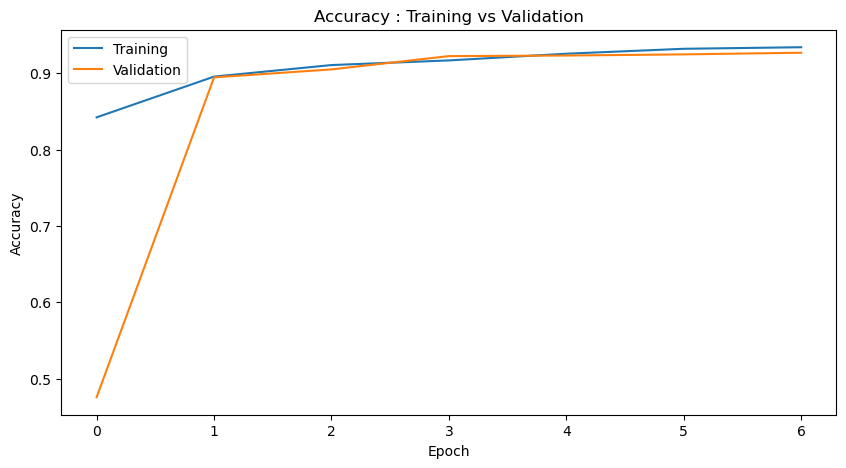

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

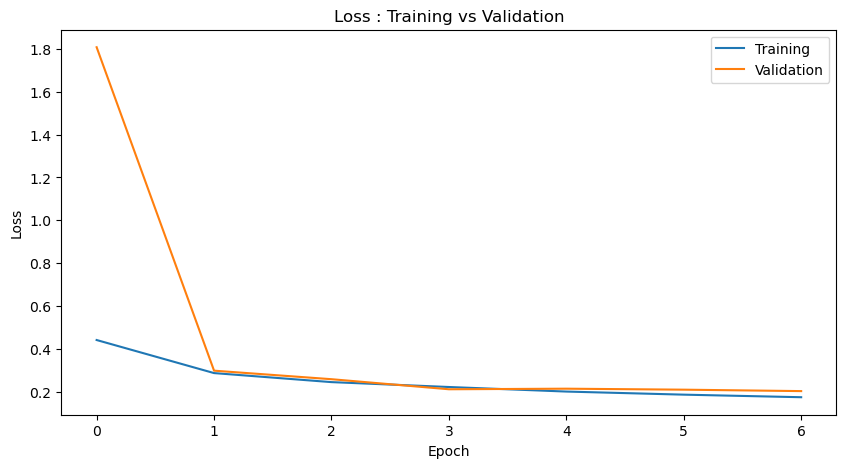

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [36]:
y_pred = model.predict(test_x)
y_pred.shape
# 10000개의 데이터가 10개의 노드 안에 들어갔다는 뜻 그 중에 가장 높은 애를 골라서 넣어줘라 그게 argmax(axis=1)이다

313/313 [==============================] - 9s 26ms/step


(10000, 10)

In [37]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

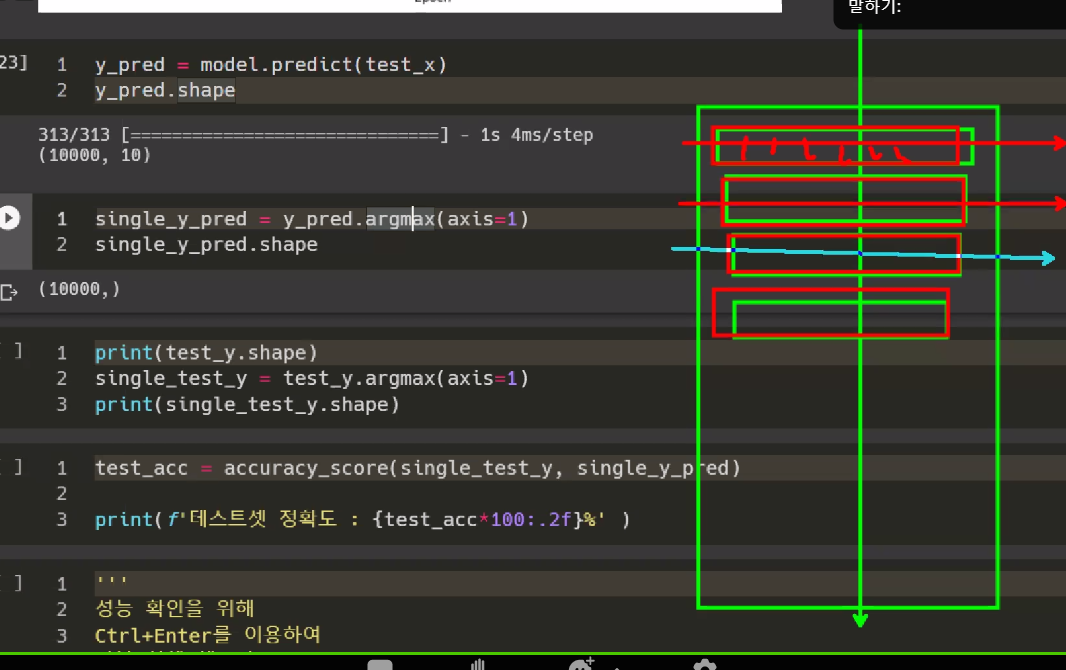

In [40]:
single_y_pred[:3] # 9, 2, 1을 가장 높은 애들로 예측 중

array([9, 2, 1], dtype=int64)

In [41]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 28, 28, 10)
(10000, 28, 10)


In [42]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets

In [43]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 7777
다음 그림은 숫자 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]] 입니다.
모델의 예측 : 6
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0. 99.  0.  0.  0.]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [44]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 0
다음 그림은 숫자 [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]] 입니다.
모델의 예측 : 9
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0.  0.  0

C:\Users\User\AppData\Local\Temp\ipykernel_25992\3689967734.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  true_false = (single_test_y==single_y_pred)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()